# Analysis of bike sharing demands in Seoul 



## Introduction 

This project focuses on analyzing the factors influencing bike rentals for a bike-sharing company. Specifically, we aim to investigate whether temperature has a significant impact on the number of bikes rented. The dataset contains information from the years 2017 and 2018, including various variables such as daily temperature, weather conditions, and historical bike rental data. 
Our goal is to use this data to build a predictive model that can estimate the number of bikes that will be rented for each month. The model will help the company optimize bike availability and manage resources more efficiently based on temperature forecasts and other environmental factors

The dataset contains the count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information. 
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information. Each coloumn in “SeoulBikeData.csv” have the following description:

    Date : the date of the day
    Rented Bike Count : number of rented bike
    Hour : the time in hour 
    Temperature(°C) : the temperature at this time 
    Humidity(%) : the pourcentage of humidity at this time
    Wind speed (m/s) : the wind speed in m/s at this time
    Visibility (10m) : the visibility per 10m at this time
    Dew point temperature(°C) : the dew point temperature of day 
    Solar Radiation (MJ/m2) : the solar radiation in MJ/m2 at this time
    Rainfall(mm) : the rain in mm at this time
    Snowfall (cm) : the snowfalls in cm at this time
    Seasons : the season of the day
    Holiday : if the day is in holiday or not
    Functioning Day : 




## Business Understanding 

The city of Seoul is well organized for bikes, like cites in Danmark, and there is a good organistton for renting bikes. As so, the bikes renting data, from a company,  have been collected and put in a database called “SeoulBikeData.csv”. With those data you can know the number of rented bike every hour from 2017 to 2019. The dataset allow us to see the cycles of bike renting every year. In fact, with those data the companies might want to forecast the bike renting, compared to the weather conditions,the day or the season. 
The purpuse of the project will be to design a model that could help the bike companies to deal with the bike stock with the wether forcast and the period. 
The following research question (RQ) havebeen formulated:

**"Determine the optimum number of bikes needed each time of day based on hour, temperature and solar radiation."**




## Data collection

The dataset that we use is from UC Irvine Machine Learning repository. It is composed of 14 columns (the features) and 8760 rows (the data). We choose this dataset because it can be useful in real life for real business and to see if its possible to forecast the number of rented bike. 
First in this part we are going to see how is the dataset and which feature are useful.

### The Library
Libraries are crucial for expanding Python’s capabilities, improving eﬀiciency, and offering solutions for a broad spectrum of tasks. To get started, it’s necessary to import the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

import statsmodels.api as sm # implements several commonly used regression methods
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import LeaveOneOut, cross_val_score
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
plt.style.use('fivethirtyeight') 

In [2]:
df = pd.read_csv('./SeoulBikeData.csv', encoding='unicode_escape')

pandas library enable to managing and preparing the data.
numpy library contribute to handling numerical operations.
matplotlib library contribute to better data visualization.
seaborn library is employed to create visualizations of statistical data.
sklearn library is employed for machine learning and modelling.

## Data Cleaning and Data Preparation


After introducing the different libraries to the program it is possible to import the single dataset at disposal.
The dataset has 8760 rows and 14 columns, the latter referred to as many features.

Data cleaning and data manipulation are necessary steps before take a closer look at the data

Further data cleaning and exploration are shown as to separate steps. In some cases exploration needs to happen while doing data cleaning because it can become an iterative process. Data cleaning is a fundamental step in any data science and machine learning project. It involves the identification and adjustment of data quality issues, which can significantly impact the accuracy and reliability of subsequent analyses and models development.




In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
df.shape

(8760, 14)

In [10]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [12]:
df.duplicated().sum()

0

Through this line is possible to see that the dataset doesn't contain any categorical data for each feature analyzed.

Furtherome the inevstigation of duplicates led to the conclusion that duplicated cells nor values are included in the original dataframe.
As a conclusion number of rows and columns have remained the same.

Missing data can arise for various reasons, such as incomplete records or data entry errors. By examining these columns, a deeper understanding is gained of the dataset’s characteristics. A identification of which columns have missing values and assess whether these gaps can be filled with reasonable imputations.
In our specific case no missing values were reported.



In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


## Data Manipulation

Data manipulation can be crucial in order to make data exploration phase easier.
In our case, the main temporal feature was the days of the year. To simplify data analysis and exploration, additional features were created, including days of the week, months, and seasons of the year.
As a result, three new columns—and therefore three new features—were added to the existing 14 features in the database, bringing the total to 17 features.

In [18]:
df.columns = df.columns.str.replace(r"\s*\(.*?\)\s*", "", regex=True)
df.columns = df.columns.str.replace(" ", "_", regex=False)

In [20]:
df.columns = [x.lower() for x in df.columns]

In [22]:
df["date"] = pd.to_datetime(df["date"], dayfirst = True)
df["day"] = df['date'].dt.day
df["month"] = df['date'].dt.month
df["year"] = df['date'].dt.year
df["weekday"] = df['date'].dt.day_name()

In [24]:
df['seasons'] = df['seasons'].map({'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3})
df['holiday'] = df['holiday'].map({"No Holiday": 0, "Holiday": 1})
df['weekday'] = df['weekday'].map({"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7})

In [26]:
df=df.drop(['functioning_day'], axis = 1)

## Heat Map
In the following section, the heat map is introduced in order to discover correlations between the numerical features
The heat map shows that there is a correlation between some features:
The main feature to analyze "rented bike count" shows acceptable and relevant level of correlations with seasonality, temperature, dew point temperature (referred to the temperature at which the external air became dry --> strictly linked to humidity).


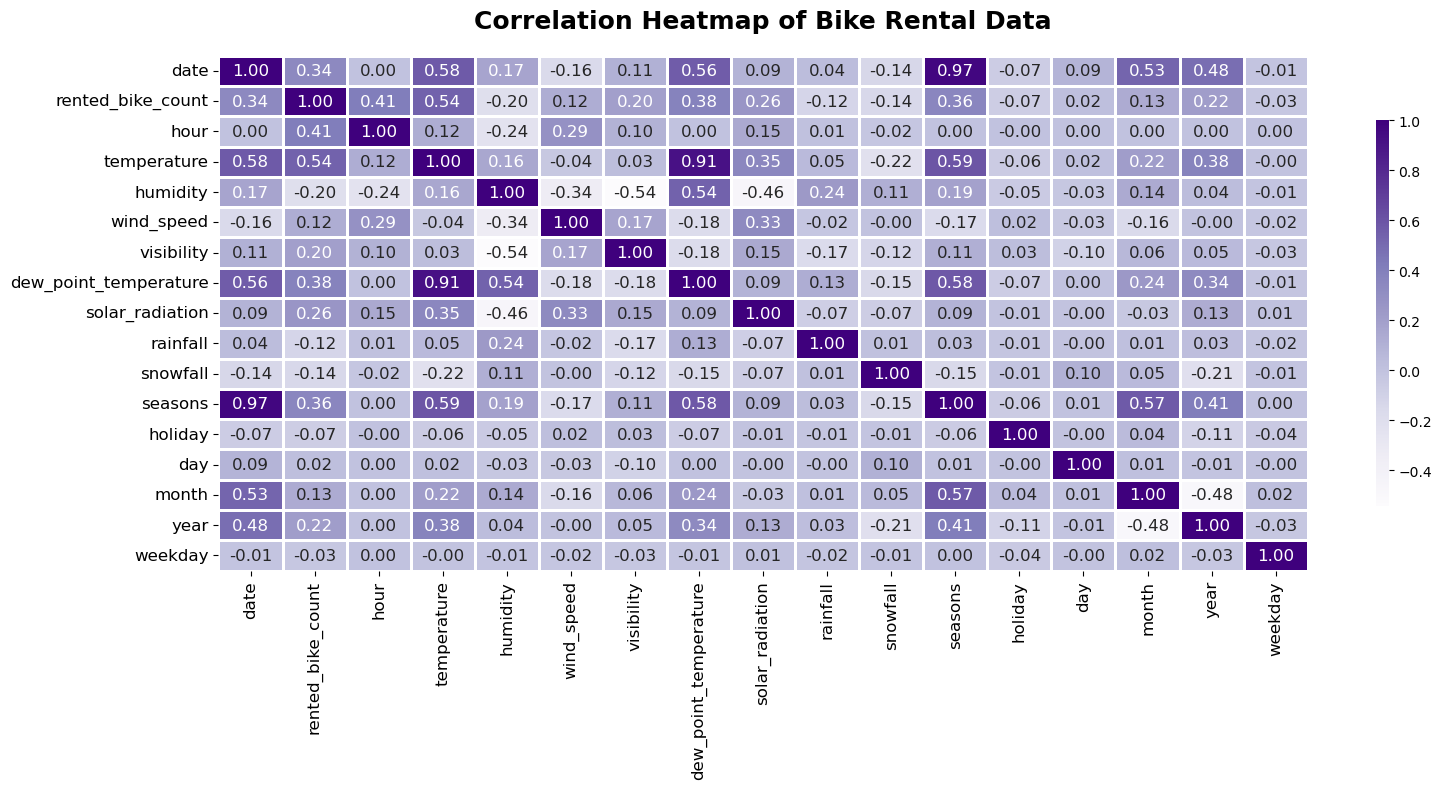

In [29]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.heatmap(df.corr(), 
            annot=True, 
            fmt='1.2f', 
            annot_kws={'size': 12},
            linewidths=1, 
            linecolor='white',
            cmap='Purples',
            cbar_kws={"shrink": 0.75, "aspect": 30})

plt.title('Correlation Heatmap of Bike Rental Data', fontsize=18, fontweight='bold', pad=20)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.tight_layout()

plt.show()

## Data Exploration

In this section, we conduct a thorough exploration of the dataset, employing visualization techniques and examining correlations between features to gain a deeper understanding.


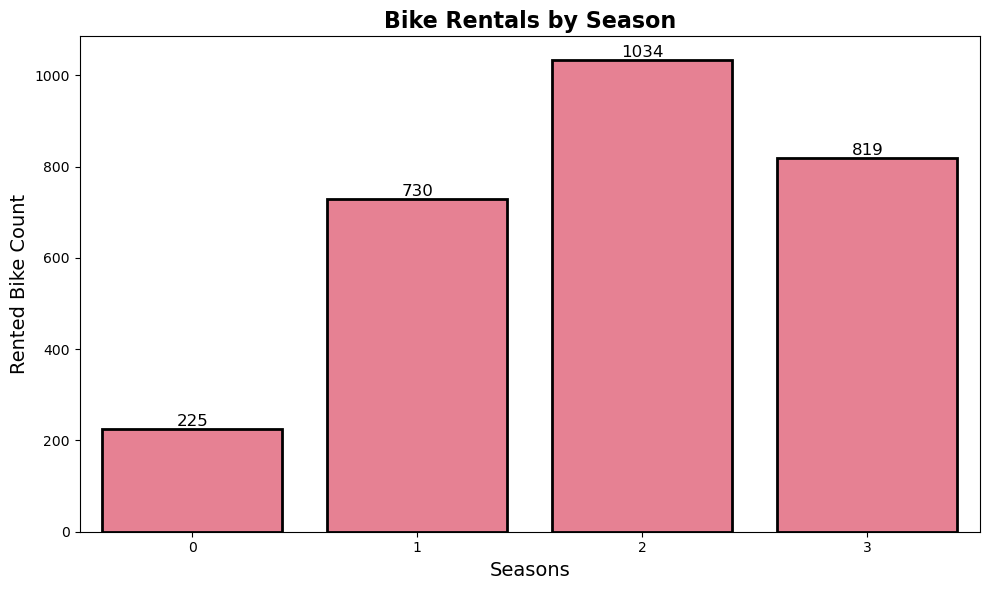

In [32]:
plt.figure(figsize=(10, 6))
sns.set_palette("husl")

ax = sns.barplot(x="seasons", y="rented_bike_count", data=df, errorbar=None)

plt.title("Bike Rentals by Season", fontsize=16, fontweight='bold')
plt.xlabel("Seasons", fontsize=14)
plt.ylabel("Rented Bike Count", fontsize=14)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

Starting from visualization of The number of bike rented per season through years
and then breakdown the same variables per month and by hour of the day, thus is displayed that mainly during summer and autumn the peak of rented bike is reached due to favourable weather conditions as confirmed by plot referred to bike rentals by month, highlighting that starting from May until October  (peak in June) rental bike services are exploited.


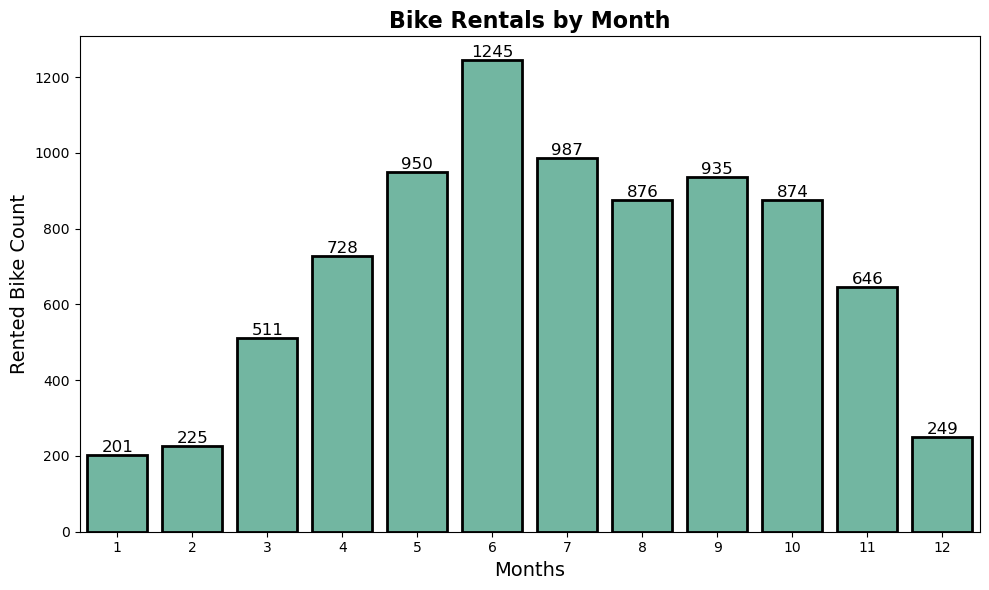

In [35]:
plt.figure(figsize=(10, 6))
sns.set_palette("Set2")

ax = sns.barplot(x="month", y="rented_bike_count", data=df, errorbar=None)

plt.title("Bike Rentals by Month", fontsize=16, fontweight='bold')
plt.xlabel("Months", fontsize=14)
plt.ylabel("Rented Bike Count", fontsize=14)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

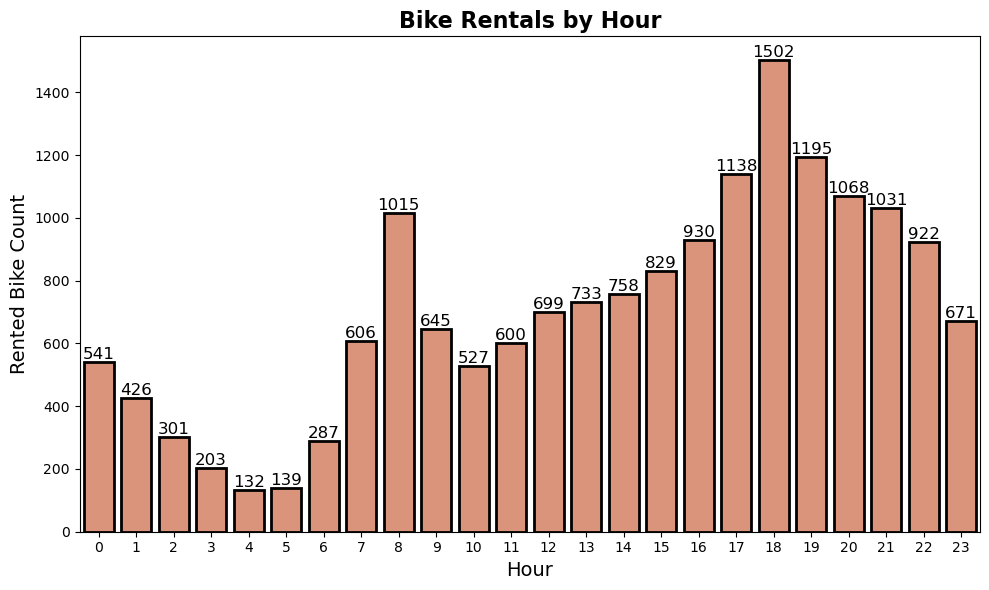

In [37]:
plt.figure(figsize=(10, 6))
sns.set_palette("flare")

ax = sns.barplot(x="hour", y="rented_bike_count", data=df, errorbar=None)

plt.title("Bike Rentals by Hour", fontsize=16, fontweight='bold')
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Rented Bike Count", fontsize=14)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

While the rented bike per hour can help understand the most likely reasons are for commuting home and work and hang out/ moving around the city during evening/dinner/after dinner.

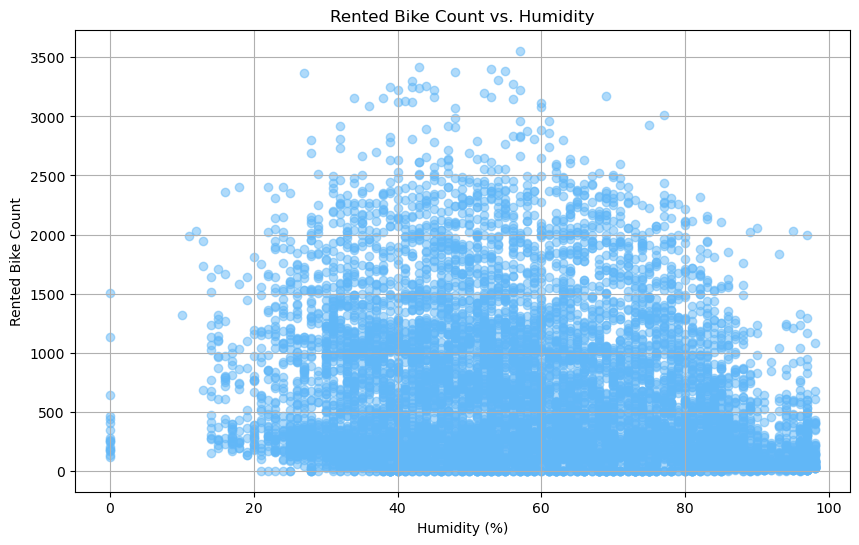

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(df['humidity'], df['rented_bike_count'], c="#61b7f7", alpha=0.5)
plt.title('Rented Bike Count vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

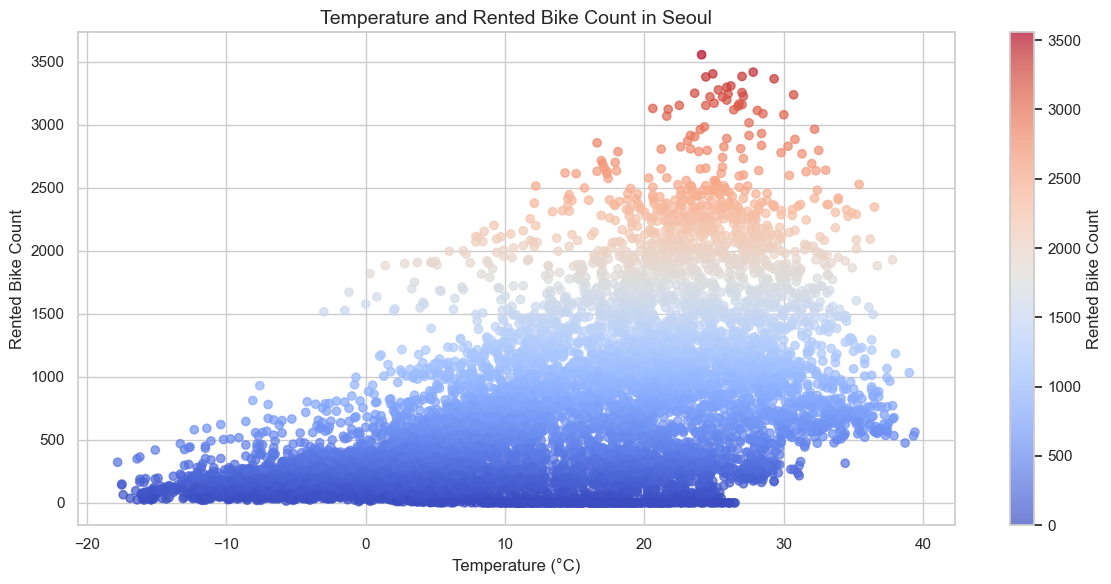

In [42]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

scatter = plt.scatter(x=df['temperature'], y=df['rented_bike_count'], 
                      c=df['rented_bike_count'], cmap='coolwarm', alpha=0.7)

plt.title('Temperature and Rented Bike Count in Seoul', fontsize=14)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Rented Bike Count', fontsize=12)

plt.colorbar(scatter, label='Rented Bike Count')

plt.tight_layout()
plt.show()

## Ralation between the temperature and the Rented bikes

In this part we wanted to see the regression of the rented bikes and only the temperature as a parameter. The method we is already in the seaborn library and it will put the linear regression of the rented bike with temperature. 

Text(0, 0.5, 'Rented Bike Count')

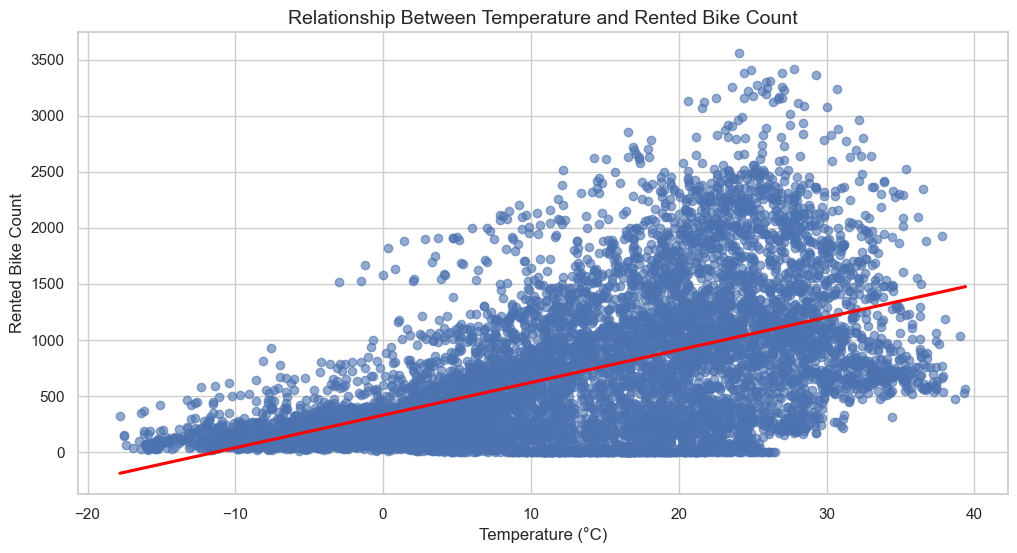

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Regression plot
sns.regplot(
    x=df['temperature'], y=df['rented_bike_count'],
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'},
    ci=None
)

# Add title and labels
plt.title('Relationship Between Temperature and Rented Bike Count', fontsize=14)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Rented Bike Count', fontsize=12)

In [ ]:
# Define the data frame
X = pd.DataFrame({'intercept': np.ones(df.shape[0]), 'temperature': df['temperature']})
X[:5]

In [ ]:
y= df['rented_bike_count']
model = sm.OLS(y,X) # does not fit the model, but specifies it 
results = model.fit()

In [ ]:
results.summary()

In [ ]:
new_df = pd.DataFrame({'intercept': np.ones(3), 'temperature': [1,6,-9]})
new_df

In [ ]:
new_predictions = results.get_prediction(new_df)

In [ ]:
new_predictions.predicted_mean

In [ ]:
# Produce confidence intervals for the predicted values:
new_predictions.conf_int(alpha=0.05)

In [ ]:
# Prediction intervals are computed by setting obs=True:
new_predictions.conf_int(obs=True, alpha=0.05)

In [ ]:
def abline(ax, b, m): # defining the function 
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m*xlim[0] +b, m*xlim[1] +b]
    ax.plot(xlim, ylim)

In [ ]:
# Including additional arguments: *args allows a number of non-named arguments to abline
def abline(ax,b,m, *args, **kwargs): # **kwards allows any number of named arguments, e.g., linewith=3 to abiline
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m *xlim[0]+b,m*xlim[1]+b]
    ax.plot(xlim, ylim, *args, **kwargs)

In [ ]:
# Let's use the new function and add the regression line to the plot of medv vs. lstat:
ax = df.plot.scatter('temperature', 'rented_bike_count')
abline(ax,
      results.params[0],
      results.params[1],
      'r--')#, # produces a red dashed line
      #linewith=3) # should define the line width

On the graph, we can see that the temperature is not the realy linear other parameters have to be in the regression to have something more precise, because we have to much uncertainity to forecast the number of rented bike. 

## MODELS AND FINDING THE FEATURE

The purpuse now will be now to find the best feature to create the best model that would have the best forecast of the rented bike. First, we try to create a multilinear regression with all the feature. The model that we are going to implement will be use the Ordinary Least Squared Method (OLS) from the sklearn library.

## Train a multiple linear regression model

In [ ]:
#First Test we try with the regular OLS with some variables of the data set to see if we have a better accuracy
# model before:
X = pd.DataFrame({'intercept': np.ones(df.shape[0]), 'temperature': df['temperature'], 'humidity' : df['humidity'], 'rain': df['rainfall'], 'hour' : df['hour'], 'weekday': df['weekday'] })
model_2pred = sm.OLS(y,X)
results_2pred = model_2pred.fit()
results_2pred.summary(model_2pred)
X

In [ ]:
new_de2 = pd.DataFrame({'intercept': np.ones(3), 'temperature': [1,7,10], 'humidity' : [37,70,40], 'rain': [0,0,0], 'hour' : [19,8,7], 'weekday': [1,7,3] })
new_de2

In [ ]:
new_predictions = results_2pred.get_prediction(new_de2)
new_predictions.predicted_mean

## Finding the good features

In [ ]:
# Train a multiple linear regression model with all variables 
# MODEL 1
data_1 = df.columns.drop(['rented_bike_count', 'date'])
X_1 = MS(data_1).fit_transform(df)
y_1 = pd.DataFrame({'rented_bike_count': df['rented_bike_count']})
model_1 = sm.OLS(y_1, X_1)
results_1 = model_1.fit()
results_1.summary(model_1)

In [ ]:
# Drop visibility, dew_point_temperature and day, because the variables have high p-values
# MODEL 2
data_2 = df.columns.drop(['rented_bike_count', 'date', 'visibility', 'dew_point_temperature', 'day'])
X_2 = MS(data_2).fit_transform(df)
y_2 = pd.DataFrame({'rented_bike_count': df['rented_bike_count']})
model_2 = sm.OLS(y_2, X_2)
results_2 = model_2.fit()
results_2.summary(model_2)

In [ ]:
# Compute the VIFs (Variance inflation factors)
vals = [VIF(X_2, i)  # Function vals with two arguments X: the dataframe or array and a variable column index
    for i in range(1, X_2.shape[1])] # Excluding the intercept value column 0 not being of interest
vif = pd.DataFrame({'vif':vals},
                  index=X_2.columns[1:])
vif 

In [ ]:
# Drop month and year and train the linear regression model with seasons, as these features have high VIF values
# MODEL 3
data_3 = df.columns.drop(['rented_bike_count', 'date', 'visibility', 'dew_point_temperature', 'day', 'month', 'year'])
X_3 = MS(data_3).fit_transform(df)
y_3 = pd.DataFrame({'rented_bike_count': df['rented_bike_count']})
model_3 = sm.OLS(y_3, X_3)
results_3 = model_3.fit()
results_3.summary(model_3)

In [ ]:
# Identifying significant features based on correlation
corr = df.corr()
features = corr["rented_bike_count"]
significant_features = features[features.abs() > 0.199]
significant_features

In [ ]:
# Train a linear regression model with the following features based on the significant_features
# MODEL 4
data_4 = df.columns.drop(['rented_bike_count', 'date', 'wind_speed', 'rainfall', 'snowfall', 'holiday', 'day', 'month', 'weekday'])
X_4 = MS(data_4).fit_transform(df)
y_4 = pd.DataFrame({'rented_bike_count': df['rented_bike_count']})
model_4 = sm.OLS(y_4, X_4)
results_4 = model_4.fit()
results_4.summary(model_4)

## Optimization of the linear regression model with interaction terms

In [ ]:
# Train MODEL 4 with 6 linear interaction terms included (see interaction term tuples below)
# hour - temperature, hour - dew_point_temperature, hour - seasons, temperature - dew_point_temperature, temperature - seasons, hour - solar_radiation
# MODEL 5
data_5 = ['hour', 'temperature', 'humidity', 'visibility', 'dew_point_temperature', 'solar_radiation', 'seasons', 'year',
          ('hour','temperature'), ('hour','dew_point_temperature'), ('hour','seasons'), ('temperature','dew_point_temperature'),
          ('temperature','seasons'), ('hour','solar_radiation')]
X_5 = MS(data_5).fit_transform(df)
y_5 = pd.DataFrame({'rented_bike_count': df['rented_bike_count']})
model_5 = sm.OLS(y_5, X_5)
results_5 = model_5.fit()
results_5.summary(model_5)

In [ ]:
# Train MODEL 4 with 6 polynomial interaction terms included (see interaction term tuples below)
# hour - temperature, hour - dew_point_temperature, hour - seasons, temperature - dew_point_temperature, temperature - seasons, hour - solar_radiation
# MODEL 6
data_6 = ['hour', 'temperature', 'humidity', 'visibility', 'dew_point_temperature', 'solar_radiation', 'seasons', 'year']
X_6_df = df[data_6]
y_6 = df['rented_bike_count']

# PolynomialFeatures für alle Variablen mit Interaktionstermen und Quadraten (Grad 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_6_poly = poly.fit_transform(X_6_df)

# Namen der neuen Polynomial Features extrahieren und in DataFrame umwandeln
poly_feature_names = poly.get_feature_names_out(data_6)
X_6 = pd.DataFrame(X_6_poly, columns=poly_feature_names)

# Das erweiterte Modell mit OLS trainieren
X_6 = sm.add_constant(X_6)  # Konstante hinzufügen
model_6 = sm.OLS(y_6, X_6)
results_6 = model_6.fit()

# Modellzusammenfassung anzeigen
print(results_6.summary())

## Training / Testing of the linear regression model with polynomial interactions

**MODEL 6** (8 features and multiple polynomial interaction terms) has the highest R^2 value, **the highest R^2 adjusted value** (takes into account the model complexity) and the lowest AIC value!\
But model 6 could lead to overfitting due to the many polynomial interaction terms.\
In the following we check the R^2 value of model 6 by splitting the training and testing data set.

In [ ]:
# Splitting data_6 into training-dataset and test-dataset
X_train, X_test, y_train, y_test = train_test_split(X_6, y_6, test_size = 0.30, random_state = 1)

In [ ]:
# Fitting training-dataset to model
model_6 = sm.OLS(y_6, X_6)
results_6 = LinearRegression().fit(X_train, y_train)

In [ ]:
# Prediction of model
y_pred = results_6.predict(X_test)

In [ ]:
# Training accuracy of model
results_6.score(X_train, y_train)

In [ ]:
# Test accuracy of model
results_6.score(X_test, y_test)

In [ ]:
# Print all the details 
print('MODEL 6 (Linear regression Model with 8 features and multiple polynomial interaction terms):')
print('----------------------------------------------------------------------------')
print('Model intercept: {}'
     .format(results_6.intercept_))
print('R-squared score (training): {:.3f}'
     .format(results_6.score(X_train, y_train)))
print('R-squared score (testing): {:.3f}'
     .format(results_6.score(X_test, y_test)))
print('----------------------------------------------------------------------------')
print('linear model coeff:\n{}'
     .format(results_6.coef_))

## Compute predictions for rented_bike_count based on MODEL 4

In [ ]:
# We use MODEL 4 to compute predictions for the rented_bike_count
data_4 = df.columns.drop(['rented_bike_count', 'date', 'wind_speed', 'rainfall', 'snowfall', 'holiday', 'day', 'month', 'weekday'])
design_4 = MS(data_4)
design_4 = design_4.fit(df)
x_4 = design_4.transform(df)
y_4 = pd.DataFrame({'rented_bike_count': df['rented_bike_count']})
model_4 = sm.OLS(y_4, X_4)
results_4 = model_4.fit()
results_4.summary(model_4)

In [ ]:
# Create the data which we wish to make predictions and transform it to the model matrix
new_df = pd.DataFrame({
    'hour': [10, 15, 20],
    'temperature': [25.5, 18.0, 10.2],
    'humidity': [55, 70, 85],
    'visibility': [2000, 3000, 1500],
    'dew_point_temperature': [15.2, 12.5, 5.0],
    'solar_radiation': [0.7, 0.5, 0.2],
    'seasons': [2, 3, 1],
    'year': [2017, 2018, 2020]
})
prediction_df = design_4.transform(new_df)
prediction_df

In [ ]:
# Getting the predictions 
new_predictions = results_4.get_prediction(prediction_df);
new_predictions.predicted_mean

In [ ]:
# Predictions and confidence intervals
conf_int = pd.DataFrame(new_predictions.conf_int(alpha=0.05), columns=['confidence_low', 'confidence_high'])
predictions_df = pd.DataFrame({
    'predicted_mean': new_predictions.predicted_mean,
    'confidence_low': conf_int['confidence_low'].values,
    'confidence_high': conf_int['confidence_high'].values
})
predictions_df

## K nearest neighbors and cross validation 

In [ ]:
X = pd.DataFrame({'temperature': df['temperature'], 'humidity' : df['humidity'], 'hour' : df['hour'], 'visibility' : df['visibility'], 'dew_point_temperature' : df['dew_point_temperature'], 'solar_radiation' : df['solar_radiation'], 'seasons':df['seasons'],'year' : df['year'] })

The type date is compatible with KNN

In [ ]:
X.head()

In [ ]:
y = pd.DataFrame({ 'rented_bike_count': df['rented_bike_count']})
y.head()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state =7, train_size=0.75)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=7)

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
y_pred = knn.predict(X_val)
mse = mean_squared_error(y_val,y_pred)
r2 = r2_score(y_val, y_pred)
print ("The real model accuracy is: \n",r2) 

In [ ]:
m = r2
for k in range (2,200):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    
    if r2>m :
        m=r2
        n=k
[m,n]

In [ ]:
loo = LeaveOneOut() 
scores = cross_val_score(clf, X, y, cv = loo)
print("CV score in average: ", scores.mean())

In [ ]:
scores=cross_val_score(clf, X, y, cv=100)
print("CV score in average: ", scores.mean())